# Importing Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
colors=["#89CFF0","#FF69B4","#FFD700","#7B68EE","#FF4500","#9370DB",
        "#32CD32","#8A2BE2","#FF6347","#20B2AA","#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]
sns.set()

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.shape

(100, 24)

In [5]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [7]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

# Product Types and Count

In [8]:
df['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

In [9]:
product_count = df['Product type'].value_counts(ascending=False)
product_count

skincare     40
haircare     34
cosmetics    26
Name: Product type, dtype: int64

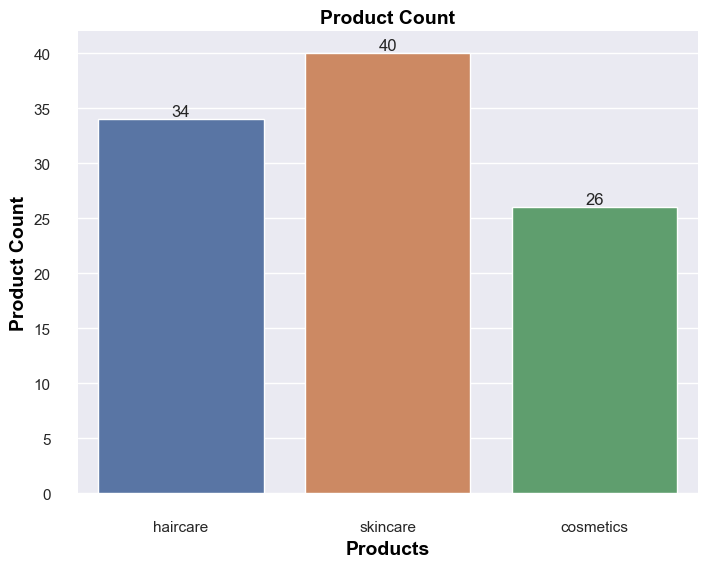

In [10]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x = 'Product type')
plt.title('Product Count',color = 'black',weight = 'bold',fontsize=14)
plt.xlabel('Products',color = 'black',weight = 'bold',fontsize=14)
plt.ylabel('Product Count',color = 'black',weight = 'bold',fontsize=14)
sns.despine(offset=10, trim=True)
sns.set_palette('bright')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()    

#### Firm have 40 Skin Care products , 34 Hair Care and 26 Cosmetic products.

# Products Volume Percentage

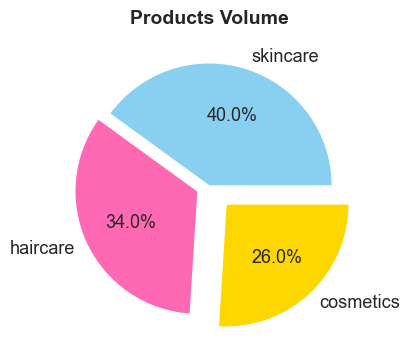

In [11]:
plt.figure(figsize=(7,4))
explode=(0,0.1,0.2)
product_count.plot(kind='pie',autopct ='%1.1f%%',explode=explode,fontsize=13,colors=colors)
plt.title('Products Volume',fontsize=14,weight='bold')
plt.ylabel(" ")

plt.show()

#### 40% of total volume is occupied by Skin Care products,
#### 34% of total volume is occupied by Hair Care products
#### 26% of total volume is occupied by Cosmetics products

#  Product Type and Avg Price

In [12]:
product_price = df.groupby('Product type')['Price'].mean().round()
product_price

Product type
cosmetics    57.0
haircare     46.0
skincare     47.0
Name: Price, dtype: float64

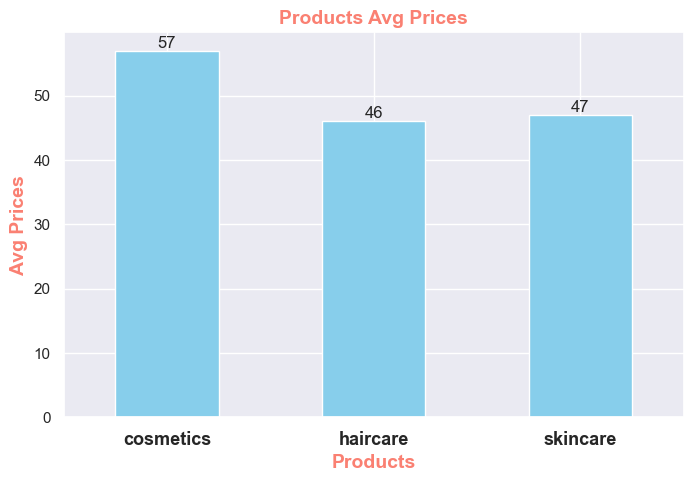

In [13]:
plt.figure(figsize=(8,5))
ax = product_price.plot(kind = 'bar',x = 'Product type',color = 'skyblue')
plt.title('Products Avg Prices',color='salmon',weight='bold',fontsize=14)
plt.xlabel('Products',color='salmon',weight='bold',fontsize=14)
plt.ylabel('Avg Prices',color='salmon',weight='bold',fontsize=14)
plt.xticks(rotation=0,weight='bold',fontsize= 13)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

##### Cosmetics products have high Avg Prices

# Products Price VS Sales 

In [14]:
price_sales = df[['Price','Number of products sold']]
price_sales

,Price,Number of products sold
0,69.808006,802
1,14.843523,736
2,11.319683,8
3,61.163343,83
4,4.805496,871
...,...,...
95,77.903927,672
96,24.423131,324
97,3.526111,62
98,19.754605,913


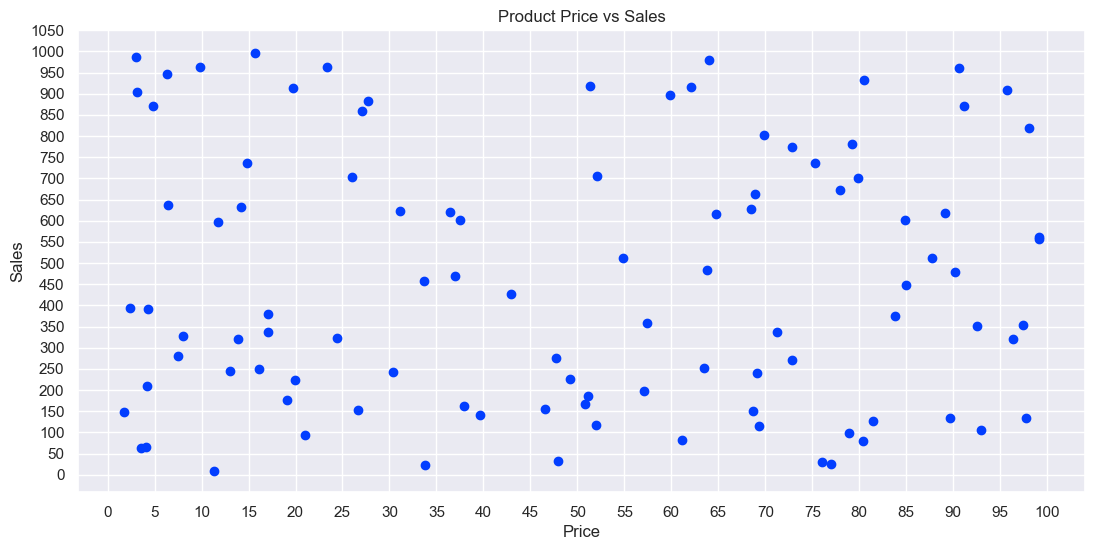

In [15]:
plt.figure(figsize=(13,6))
plt.scatter(x='Price',y='Number of products sold',data=price_sales)
plt.xticks(range(0,105,5))
plt.yticks(range(0,1100,50))
plt.title('Product Price vs Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

### Products prices are not effecting Sales, as we can see the graph Low price products also have low Sales and High price products also have greater Sales.  

# Products Types VS Sales

In [16]:
type_sales = df.groupby('Product type')['Number of products sold'].sum()
type_sales

Product type
cosmetics    11757
haircare     13611
skincare     20731
Name: Number of products sold, dtype: int64

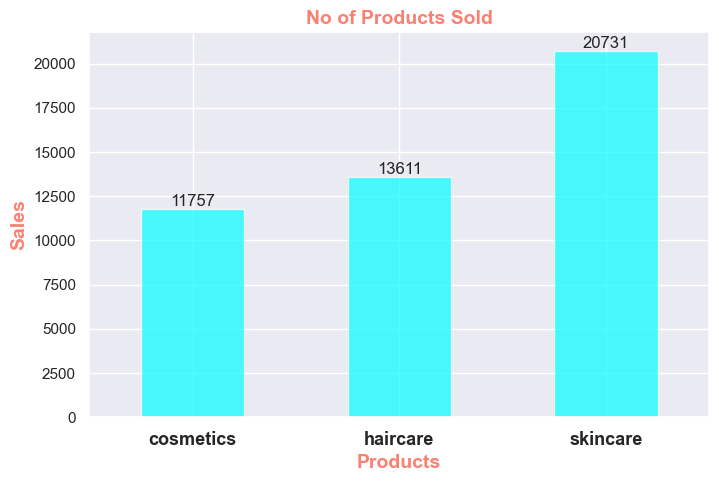

In [17]:
plt.figure(figsize=(8,5))
ax = type_sales.plot(kind = 'bar',x = 'Product type',color = 'cyan',alpha = 0.7)
plt.title('No of Products Sold',color='salmon',weight='bold',fontsize=14)
plt.xlabel('Products',color='salmon',weight='bold',fontsize=14)
plt.ylabel('Sales',color='salmon',weight='bold',fontsize=14)
plt.xticks(rotation=0,weight='bold',fontsize= 13)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

#### Firm has sold 20731 units of Skincare while 13611 and 11757 of Haircare and Cosmectics respectively

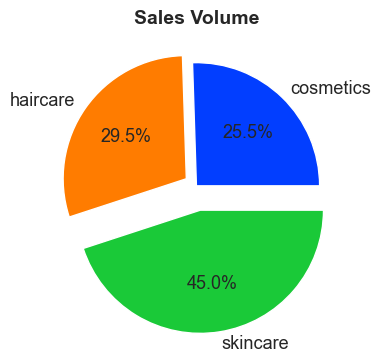

In [18]:
plt.figure(figsize=(7,4))
explode=(0,0.1,0.2)
type_sales.plot(kind='pie',autopct ='%1.1f%%',explode=explode,fontsize=13)
plt.title('Sales Volume',fontsize=14,weight='bold')
plt.ylabel(" ")

plt.show()

#### Skincare products have 45% of sales volume of company sales

# Which product type generated high revenue?

In [19]:
revenue = df.groupby('Product type')['Revenue generated'].sum().round()
revenue

Product type
cosmetics    161521.0
haircare     174455.0
skincare     241628.0
Name: Revenue generated, dtype: float64

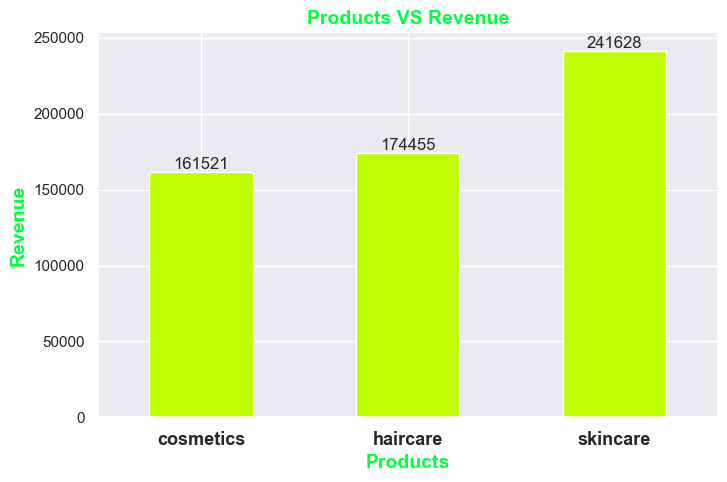

In [20]:
plt.figure(figsize=(8,5))
ax = revenue.plot(kind = 'bar',x = 'Product type',color = '#bfff00')
plt.title('Products VS Revenue',color='#00ff40',weight='bold',fontsize=14)
plt.xlabel('Products',color='#00ff40',weight='bold',fontsize=14)
plt.ylabel('Revenue',color='#00ff40',weight='bold',fontsize=14)
plt.xticks(rotation=0,weight='bold',fontsize= 13)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

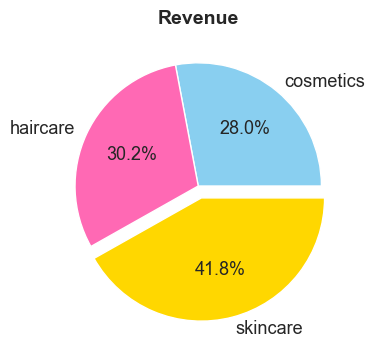

In [21]:
plt.figure(figsize=(7,4))
explode=(0,0,0.1)
revenue.plot(kind='pie',autopct ='%1.1f%%',explode=explode,fontsize=13,colors=colors)
plt.title('Revenue',fontsize=14,weight='bold')
plt.ylabel(" ")

plt.show()

### 41.8% Revenue is generated by Skincare products

# Product Type VS Customer Demographics

In [22]:
df['Customer demographics'].unique()

array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object)

In [23]:
ptype_customer = df[['Product type','Customer demographics']]
ptype_customer

,Product type,Customer demographics
0,haircare,Non-binary
1,skincare,Female
2,haircare,Unknown
3,skincare,Non-binary
4,skincare,Non-binary
...,...,...
95,haircare,Unknown
96,cosmetics,Non-binary
97,haircare,Male
98,skincare,Female


<Figure size 1400x600 with 0 Axes>

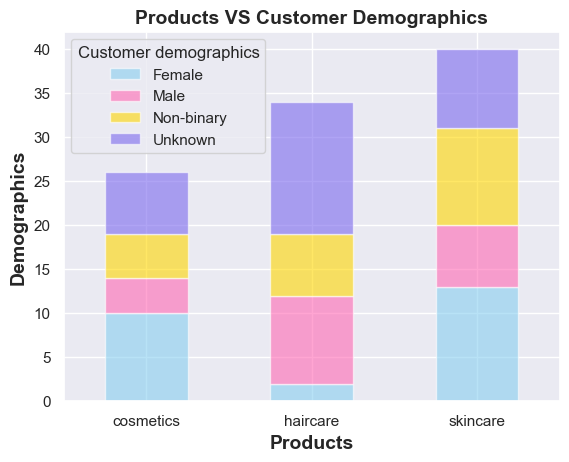

In [24]:
ptype_customer = df.groupby(['Product type', 'Customer demographics']).size().unstack()
plt.figure(figsize=(14,6))
ax = ptype_customer.plot(kind = 'bar',stacked=True,color = colors,alpha=0.6)
plt.title('Products VS Customer Demographics',weight='bold',fontsize=14)
plt.xlabel('Products',weight='bold',fontsize=14)
plt.ylabel('Demographics',weight='bold',fontsize=14)
plt.xticks(rotation=0)

plt.show()

#### Females purchased Cosmetic products more than males.
#### Males purchased Haircare products more than Females.
#### Females purchased Skincare products more than Males.

# Product Type VS Production Volumes

In [25]:
df[['Product type','Production volumes']]

,Product type,Production volumes
0,haircare,215
1,skincare,517
2,haircare,971
3,skincare,937
4,skincare,414
...,...,...
95,haircare,450
96,cosmetics,648
97,haircare,535
98,skincare,581


In [26]:
production = df.groupby('Product type')['Production volumes'].sum()
production

Product type
cosmetics    12461
haircare     19957
skincare     24366
Name: Production volumes, dtype: int64

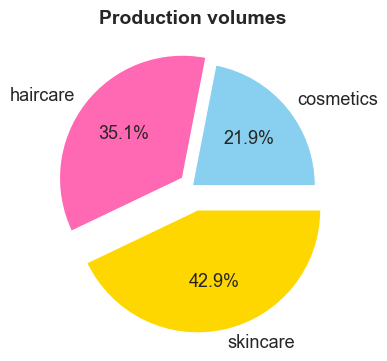

In [27]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(7,4))
explode=(0,0.1,0.2)
production.plot(kind='pie',autopct ='%1.1f%%',explode=explode,fontsize=13,colors=colors)

plt.title('Production volumes',fontsize=14,weight='bold')
plt.ylabel(" ")

plt.show()

# Product Type VS Manufacturing Costs and Manufacturing Lead Time

In [28]:
mfg_cost = df.groupby('Product type')[['Manufacturing costs','Manufacturing lead time']].sum()
mfg_cost

,Manufacturing costs,Manufacturing lead time
Product type,,
cosmetics,1119.371253,346
haircare,1647.571776,580
skincare,1959.726295,551


<Figure size 1400x600 with 0 Axes>

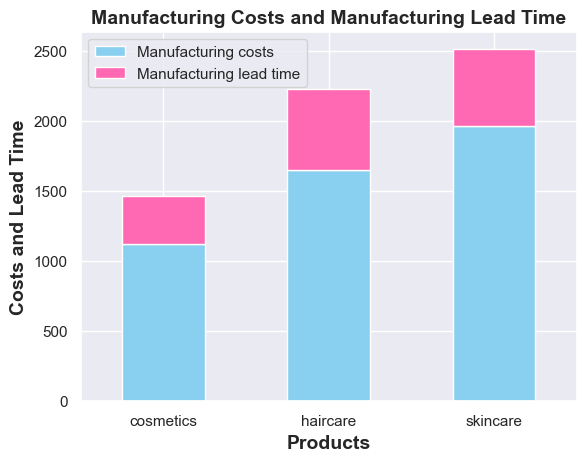

In [29]:
plt.figure(figsize=(14,6))
ax = mfg_cost.plot(kind = 'bar',stacked=True,color = colors)
plt.title('Manufacturing Costs and Manufacturing Lead Time',weight='bold',fontsize=14)
plt.xlabel('Products',weight='bold',fontsize=14)
plt.ylabel('Costs and Lead Time',weight='bold',fontsize=14)
plt.xticks(rotation=0)

plt.show()

#### Skincare products have greater Mfg Cost but small Mfg Lead Time
#### Haircare products have less Mfg Cost but large Mfg Lead Time
#### Cosmetics products have less Mfg Cost and less Mfg Lead Time than Haircare and Skincare products

# Product type VS Defect rates

In [30]:
defects = df.groupby('Product type')['Defect rates'].sum().round()
defects

Product type
cosmetics    50.0
haircare     84.0
skincare     93.0
Name: Defect rates, dtype: float64

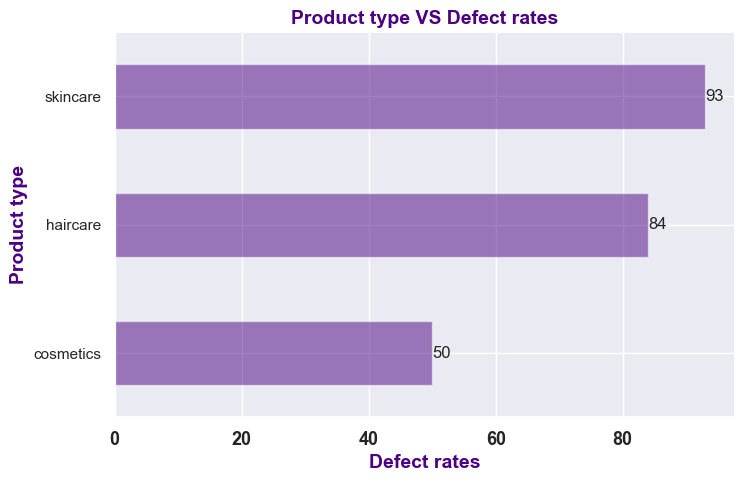

In [31]:
plt.figure(figsize=(8,5))
ax = defects.plot(kind = 'barh',x = 'Defect rates',color = 'indigo',alpha=0.5)
plt.title('Product type VS Defect rates',color='indigo',weight='bold',fontsize=14)
plt.xlabel('Defect rates',color='indigo',weight='bold',fontsize=14)
plt.ylabel('Product type',color='indigo',weight='bold',fontsize=14)
plt.xticks(rotation=0,weight='bold',fontsize= 13)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

####  Skincare products have highest Defects rates